# Test a Perceptual Phenomenon - Stroop Effect

## Background Information

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example <font size="3" color="red">RED</font>, <font size="3" color="blue">BLUE</font>. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example <font size="3" color="green">PURPLE</font>, <font size="3" color="brown">ORANGE</font>. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

<font size="3" color="red">My result test:</font> <b>12.23</b> Congruent, <b>23.12</b> Incongruent.

### 1. What is our independent variable? What is our dependent variable?

<b>Dependent variable:</b> Time in seconds that the participant takes to finish the test.

<b>Independent variable:</b> The test classification between <i>congruent</i> or <i>incongruent</i> (taking into consideration the same size list). Otherwise, the size list also must be considered a independent variable able to impact time.

### 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

Be:

$\bar{x}_c:$ The sample mean for the time used to recognize and say the colours in a congruent test.

$\bar{x}_i:$ The sample mean for the time used to recognize and say the colours in an incongruent test.

<b>Hypotheses are:</b>

$H_0$: $\mu_c = \mu_i$ (*There is not* a real difference between group population means. In other words, there is not a Stroop Effect)

$H_A$: $\mu_c \neq \mu_i$ (*There is* a real difference between group population means. In other words, there is a Stroop Effect)

<b>Justification:</b>

We want to check whether based on our data there is an evidence about a Stroop Effect in the population. In order to test whether there is a difference between population means when we do not know about the population variance $({\sigma}^2)$ but we know the sample variance $(s^2)$. We expect to perform a [Dependent t-test for paired samples](https://en.wikipedia.org/wiki/Student%27s_t-test). This test is used when the samples are dependent; that is, when there is only one sample that has been tested twice (repeated measures) or when there are two samples that have been matched or "paired". Thus, for us that is the case because on this experiment each individual was tested twice with a *congruent* and an *incongruent* test.
<hr>



Now it’s your chance to try out the Stroop task for yourself. Go to this link, which has a Java-based applet for performing the Stroop task. Record the times that you received on the task (you do not need to submit your times to the site.) Now, download this dataset which contains results from a number of participants in the task. Each row of the dataset contains the performance for one participant, with the first number their results on the congruent task and the second number their performance on the incongruent task.



#### 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [1]:
import pandas as pd
path = r'~/Downloads/stroopdata.csv'
stroopEffectData = pd.read_csv(path)
stroopEffectData.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


#### 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

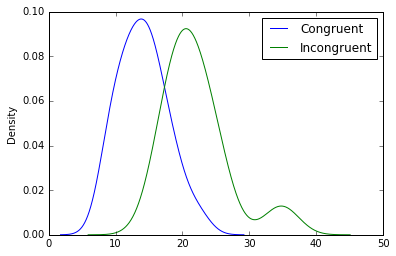

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

stroopEffectData.plot.kde()

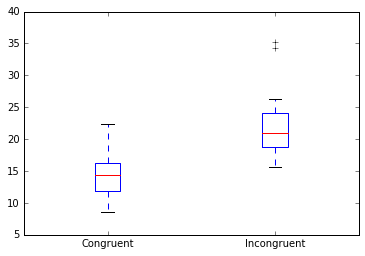

In [3]:
stroopEffectData.plot.box()

**Notes:**
<ul>
<li>On average, people conclude *congruent* test more fast than *incongruent* test;</li>
<li>There is more variability on *incongruent* test;</li>
<li>There are ~ 20% outliers on *incongruent* test;</li>
<li>*Incongruent* test tends towards bimodality.</li>

</ul>

#### 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

*Processing the statistical test:*

In [4]:
from scipy import stats
t,p = stats.ttest_rel(stroopEffectData.Congruent,stroopEffectData.Incongruent)
print 'statistic:', t
print 'p-value:', p

statistic: -8.02070694411
p-value: 4.10300058571e-08


*Confidence level*, $\alpha = 0.05$

*There are two critcal statistic values: *

In [5]:
t_alphaL, t_alphaR = [-stats.t.isf([0.025], 23),stats.t.isf([0.025], 23)]
print 'left tail:', t_alphaL
print 'right tail:', t_alphaR

left tail: [-2.06865761]
right tail: [ 2.06865761]


*Showing **t** statistics overcome the critical statistic values:*

In [6]:
import numpy as np
diff = stroopEffectData.Incongruent - stroopEffectData.Congruent 
meanD, sD = np.mean(diff), np.std(diff, ddof=1)
print meanD
sR = len(diff)**0.5
tm = meanD/(sD/sR)
print 't > right critical value ?', tm > t_alphaR
print 't < left critical value ?', -tm < t_alphaL

print -tm == t

7.96479166667
t > right critical value ? [ True]
t < left critical value ? [ True]
True


We reject the null hypothesis at a significance level of **95%**. 

Yes they did. But we just have a single evidence about the Stroop Effect. This experiment is not enough to prove that this effect really exists.

In [12]:
import numpy as np
import scipy as sp
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    meanD, sD = np.mean(diff), np.std(data, ddof=1)
    h = sD * sp.stats.t._ppf((1+confidence)/2., len(data)-1)
    return meanD, meanD-h, meanD+h
m,c1,c2 = mean_confidence_interval(stroopEffectData.Incongruent-stroopEffectData.Congruent)
print m,c1,c2

7.96479166667 -2.09886954482 18.0284528782


In [16]:
stroopEffectData

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


In [23]:
diff = stroopEffectData.Congruent - stroopEffectData.Incongruent
stroopEffectData['Cong-Incong'] = diff
print 'mean:',np.mean(diff)
print 'se:',np.std(diff, ddof=1)
stroopEffectData

mean: -7.96479166667
se: 4.86482691036


,Congruent,Incongruent,Cong-Incong
0,12.079,19.278,-7.199
1,16.791,18.741,-1.950
2,9.564,21.214,-11.650
3,8.630,15.687,-7.057
4,14.669,22.803,-8.134
5,12.238,20.878,-8.640
6,14.692,24.572,-9.880
7,8.987,17.394,-8.407
8,9.401,20.762,-11.361
9,14.480,26.282,-11.802


#### 6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

I think that just by placed congruent test first conditions the brain to read the words instead of paying attention to the colors and force standard break effects to the incongruent test in sequence. For me its a bias. Maybe if the experiment starts with the incongruent test might help to avoid this bias. I think that an alternative or similar task would be putting words inside other words with the same colors and after with different colors to check the time to read each word.